In [3]:
df = pd.read_csv(r"C:\Users\range\Downloads\archive (12)\penguins_size.csv")


In [1]:
import seaborn as sns

culmen length vs culmen depth can distribute all 3 species quite well

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

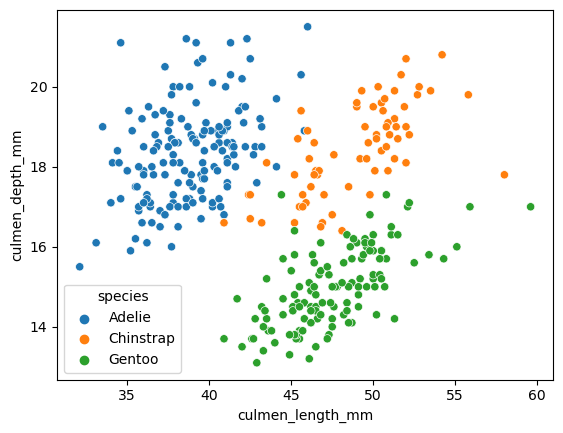

In [4]:
sns.scatterplot(x=df["culmen_length_mm"], y=df["culmen_depth_mm"],hue=df["species"])

<Axes: xlabel='culmen_depth_mm', ylabel='flipper_length_mm'>

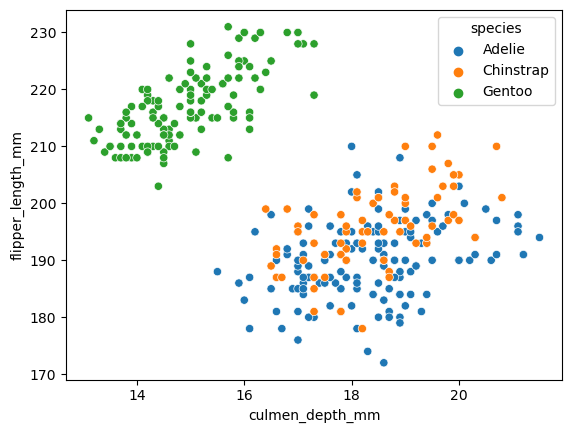

In [5]:
sns.scatterplot(x=df["culmen_depth_mm"], y=df["flipper_length_mm"],hue=df["species"])

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

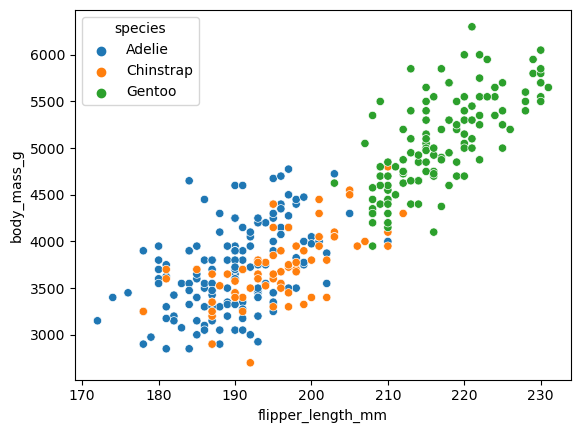

In [6]:
sns.scatterplot(x=df["flipper_length_mm"], y=df["body_mass_g"],hue=df["species"])

also culmen length vs body mass can distribute all 3 species 

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

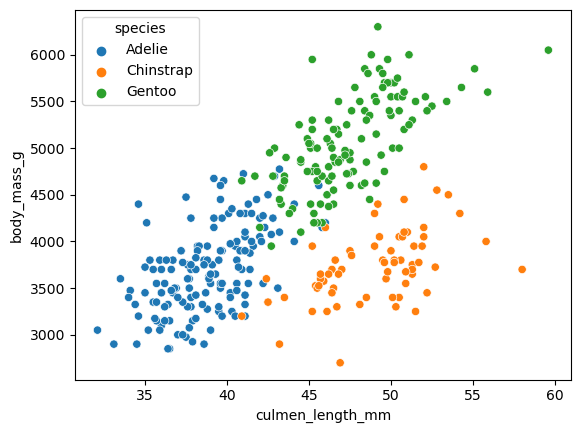

In [7]:
sns.scatterplot(x=df["culmen_length_mm"], y=df["body_mass_g"],hue=df["species"])

C:\Users\range\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


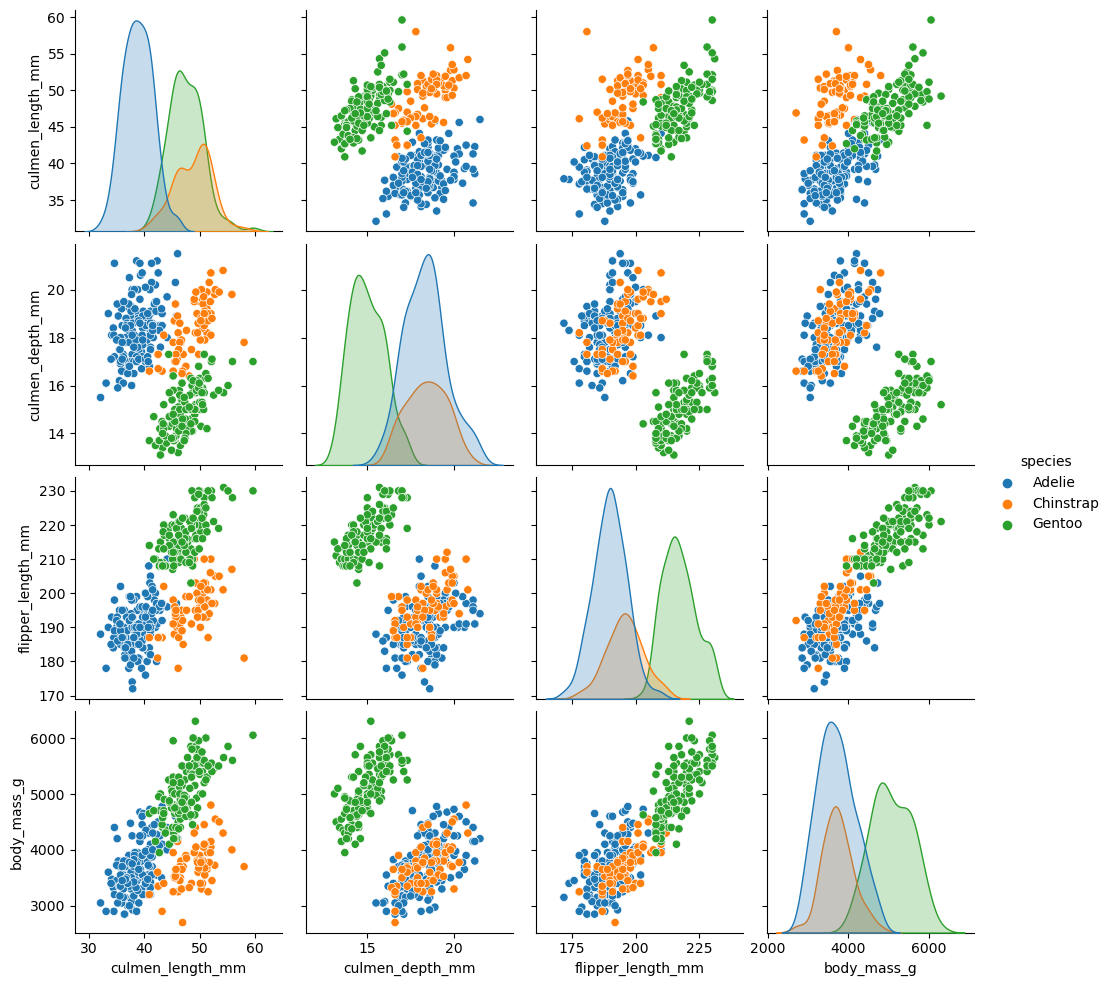

In [8]:
sns.pairplot(data=df,hue='species')

In [2]:
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Input


In [3]:
from keras.layers import BatchNormalization
from sklearn.preprocessing import LabelEncoder
from keras_tuner.tuners import RandomSearch

Using TensorFlow backend


In [6]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
df.fillna(method='bfill',inplace=True)

In [9]:
df.columns[df.isnull().sum() > 0]

Index([], dtype='object')

In [8]:
df.fillna(method='ffill',inplace=True)

In [10]:
df[['1','2','3']] = pd.get_dummies(df['island'])

In [11]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,1,2,3
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,False,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,False,False,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,False,False,True
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,False,False,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,False,False,True
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,True,False,False
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,True,False,False
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,True,False,False
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,True,False,False


In [14]:
code = {False:0, True:1 }

df['3'] = df['3'].apply(lambda x : code[x])

df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,1,2,3
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,0,1
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,0,1
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,1,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,1,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1,0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1,0,0


In [16]:
df[['4','5','6']] = pd.get_dummies(df['sex'])

In [22]:
del df['sex']

In [44]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [23]:
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,1,2,3,5,6
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,46.8,14.3,215.0,4850.0,1,0,0,1,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [34]:
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,1,2,3,5,6
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,46.8,14.3,215.0,4850.0,1,0,0,1,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [21]:
code = {False:0, True:1 }

df['5'] = df['5'].apply(lambda x : code[x])

df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,1,2,3,5,6
0,Adelie,39.1,18.7,181.0,3750.0,MALE,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,0,0,1,1,0
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,46.8,14.3,215.0,4850.0,FEMALE,1,0,0,1,0
340,Gentoo,46.8,14.3,215.0,4850.0,FEMALE,1,0,0,1,0
341,Gentoo,50.4,15.7,222.0,5750.0,MALE,1,0,0,0,1
342,Gentoo,45.2,14.8,212.0,5200.0,FEMALE,1,0,0,1,0


In [24]:
x=df.iloc[:,1:10]
y=df['species']

In [27]:
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,1,2,3,5,6
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,36.7,19.3,193.0,3450.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
339,46.8,14.3,215.0,4850.0,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   344 non-null    float64
 1   culmen_depth_mm    344 non-null    float64
 2   flipper_length_mm  344 non-null    float64
 3   body_mass_g        344 non-null    float64
 4   1                  344 non-null    int64  
 5   2                  344 non-null    int64  
 6   3                  344 non-null    int64  
 7   5                  344 non-null    int64  
 8   6                  344 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 24.3 KB


In [36]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 344 entries, 0 to 343
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
344 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


In [29]:
xtrn,xtst,ytrn,ytst=train_test_split(x,y,test_size=0.2)

In [30]:
std=StandardScaler()

In [31]:
xtrn[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]]=std.fit_transform(xtrn[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]])

In [32]:
xtrn

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,1,2,3,5,6
16,-0.986175,0.934707,-0.447085,-0.946673,0,0,1,1,0
134,-1.097626,0.229372,-1.020941,-0.977614,0,1,0,1,0
27,-0.651821,0.380515,-1.020941,-1.256080,1,0,0,1,0
140,-0.707547,-0.022534,-0.590549,-1.008554,0,1,0,1,0
167,1.205700,1.236994,-0.016694,-0.204096,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
305,1.261426,0.078228,1.920068,1.714227,1,0,0,0,1
6,-0.949024,0.330134,-1.451332,-0.730088,0,0,1,1,0
210,1.149974,0.833945,0.055038,-0.513503,0,1,0,0,1
225,0.462692,-1.836255,0.628893,0.414718,1,0,0,1,0


In [33]:
xtst[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]]=std.transform(xtst[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]])

In [34]:
xtst

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,1,2,3,5,6
292,0.778470,-0.778251,1.417944,1.095413,1,0,0,0,1
201,1.075673,0.078228,-0.231890,-0.668207,0,1,0,1,0
275,0.184063,-0.879013,1.346212,1.033532,1,0,0,0,1
29,-0.651821,0.884326,-1.523064,-0.327859,1,0,0,0,1
299,0.221214,-0.375202,1.561408,2.147397,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
169,2.598841,0.330134,-1.451332,-0.637266,0,1,0,1,0
80,-1.747758,0.027847,-0.877477,-1.256080,0,0,1,1,0
76,-0.577520,-0.173678,-0.734013,-0.637266,0,0,1,1,0
120,-1.450555,0.027847,-1.020941,-1.317961,0,0,1,1,0


In [36]:
ytst.info()

<class 'pandas.core.series.Series'>
Index: 69 entries, 292 to 78
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
69 non-null     object
dtypes: object(1)
memory usage: 1.1+ KB


In [40]:
ytrn.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [41]:
code = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}

ytrn = ytrn.apply(lambda x : code[x])

ytrn

16     0
134    0
27     0
140    0
167    1
      ..
305    2
6      0
210    1
225    2
331    2
Name: species, Length: 275, dtype: int64

In [44]:
code = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}

ytst = ytst.apply(lambda x : code[x])

ytst

292    2
201    1
275    2
29     0
299    2
      ..
169    1
80     0
76     0
120    0
78     0
Name: species, Length: 69, dtype: int64

In [45]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(xtrn.shape[1],)))
    
    for i in range(hp.Int("hiddenlayers", min_value=5, max_value=10)):
        model.add(Dense(units=hp.Int("neurons{}".format(i), min_value=1, max_value=15),
                        activation=hp.Choice("activation", values=["sigmoid", "tanh", "relu"]),
                        kernel_initializer=hp.Choice("weight_init", values=["glorot_uniform", "glorot_normal", "he_uniform", "he_normal"])))

    model.add(Dense(3, activation='softmax'))  
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [46]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory=r"C:\Users\range\Downloads\archive (18)",
    project_name="list_of_models"
)

In [47]:
tuner.search(xtrn, ytrn, epochs=15, validation_data=(xtst, ytst))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 26s


In [48]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
hiddenlayers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
weight_init (Choice)
{'default': 'glorot_uniform', 'conditions': [], 'values': ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'], 'ordered': False}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1

In [49]:
tuner.results_summary()

Results summary
Results in C:\Users\range\Downloads\archive (18)\list_of_models
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
hiddenlayers: 6
neurons0: 12
activation: tanh
weight_init: he_uniform
neurons1: 8
neurons2: 8
neurons3: 8
neurons4: 11
neurons5: 3
neurons6: 2
neurons7: 10
neurons8: 4
neurons9: 10
Score: 1.0

Trial 2 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 3
activation: relu
weight_init: glorot_normal
neurons1: 4
neurons2: 4
neurons3: 13
neurons4: 13
neurons5: 11
neurons6: 7
neurons7: 15
Score: 0.6521739363670349

Trial 0 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 6
activation: relu
weight_init: he_normal
neurons1: 10
neurons2: 5
neurons3: 14
neurons4: 10
neurons5: 1
neurons6: 1
neurons7: 1
Score: 0.4637681245803833

Trial 1 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 3
activation: sigmoid
weight_init: glorot_uniform
neurons1: 6
neurons2: 12
neurons3: 10
neurons4: 2
neurons5: 8
neurons6: 4
neur

In [50]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12)                120       
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 11)                99        
                                                                 
 dense_12 (Dense)            (None, 3)                 36        
                                                                 
 dense_13 (Dense)            (None, 3)                

In [52]:
hist=model.fit(xtrn,ytrn,batch_size=10,epochs=10,validation_split=0.1)

Epoch 1/10
25/25 [==============================] - 2s 16ms/step - loss: 0.7886 - accuracy: 0.7854 - val_loss: 0.6926 - val_accuracy: 0.7857
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6241 - accuracy: 0.8543 - val_loss: 0.5697 - val_accuracy: 0.9643
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5211 - accuracy: 0.9514 - val_loss: 0.4895 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4473 - accuracy: 0.9838 - val_loss: 0.4185 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.3880 - accuracy: 0.9960 - val_loss: 0.3666 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.3411 - accuracy: 0.9960 - val_loss: 0.3267 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.3053 - accuracy: 0.9960 - val_loss: 0.2944 - val_accuracy: 1.0000
Epoch 8/10
25/25 [=

In [53]:
import matplotlib.pyplot as plt

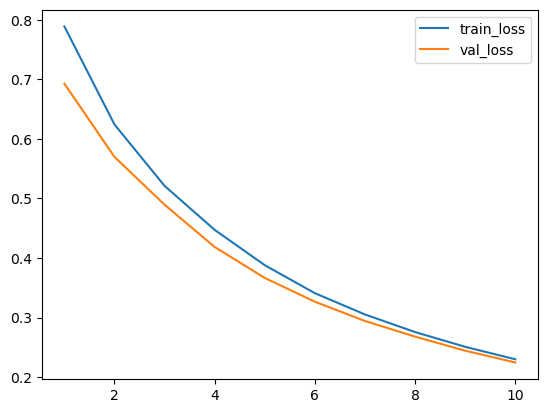

In [54]:
plt.plot(range(1,11),hist.history["loss"],label="train_loss")
plt.plot(range(1,11),hist.history["val_loss"],label="val_loss")
plt.legend()

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(xtst)

y_pred_classes = y_pred.argmax(axis=-1)

accuracy = accuracy_score(ytst, y_pred_classes)
precision = precision_score(ytst, y_pred_classes, average='weighted')
recall = recall_score(ytst, y_pred_classes, average='weighted')
f1 = f1_score(ytst, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

3/3 [==============================] - 0s 4ms/step
Accuracy: 0.9855072463768116
Precision: 0.9859464207290294
Recall: 0.9855072463768116
F1 Score: 0.9853503447706347


In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

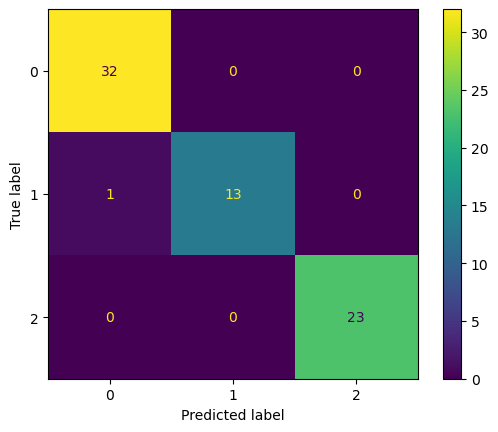

In [59]:
cm = confusion_matrix(ytst,y_pred_classes)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()